<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Observe-real-data-for-replication" data-toc-modified-id="Observe-real-data-for-replication-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Observe real data for replication</a></span></li><li><span><a href="#Create-synthetic-availability-methodology" data-toc-modified-id="Create-synthetic-availability-methodology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create synthetic availability methodology</a></span><ul class="toc-item"><li><span><a href="#Event-frequency" data-toc-modified-id="Event-frequency-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Event frequency</a></span><ul class="toc-item"><li><span><a href="#Generate-random-events" data-toc-modified-id="Generate-random-events-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Generate random events</a></span></li><li><span><a href="#Cut-of-unrealistic-values" data-toc-modified-id="Cut-of-unrealistic-values-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Cut-of unrealistic values</a></span></li><li><span><a href="#Eliminate-some-of-the-noise" data-toc-modified-id="Eliminate-some-of-the-noise-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Eliminate some of the noise</a></span></li><li><span><a href="#Event-frequency-results" data-toc-modified-id="Event-frequency-results-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Event frequency results</a></span></li></ul></li><li><span><a href="#Event-severity" data-toc-modified-id="Event-severity-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Event severity</a></span><ul class="toc-item"><li><span><a href="#Increase-severity-(duration)-of-events" data-toc-modified-id="Increase-severity-(duration)-of-events-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Increase severity (duration) of events</a></span></li></ul></li></ul></li><li><span><a href="#Synthetic-Availability-Function" data-toc-modified-id="Synthetic-Availability-Function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Synthetic Availability Function</a></span><ul class="toc-item"><li><span><a href="#Working-out-scaling" data-toc-modified-id="Working-out-scaling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Working out scaling</a></span><ul class="toc-item"><li><span><a href="#Frequency" data-toc-modified-id="Frequency-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Frequency</a></span></li><li><span><a href="#Severity" data-toc-modified-id="Severity-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Severity</a></span></li></ul></li><li><span><a href="#Callable-function" data-toc-modified-id="Callable-function-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Callable function</a></span></li></ul></li><li><span><a href="#Append-sythetic-data" data-toc-modified-id="Append-sythetic-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Append sythetic data</a></span><ul class="toc-item"><li><span><a href="#Grid-availability" data-toc-modified-id="Grid-availability-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Grid availability</a></span></li><li><span><a href="#Contractual-Availability" data-toc-modified-id="Contractual-Availability-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Contractual Availability</a></span></li><li><span><a href="#Technical-Availability" data-toc-modified-id="Technical-Availability-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Technical Availability</a></span></li><li><span><a href="#Verify" data-toc-modified-id="Verify-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Verify</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [5]:
plant_1 = pd.read_excel('./Example data.xlsx', sheet_name='plant_1', index_col=0, parse_dates=True)

In [6]:
# Plant 1 has a complete data set, which can serve as a reference.
plant_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52704 entries, 2020-01-01 00:00:00 to 2020-12-31 23:50:00
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wind speed (m/s)          51854 non-null  float64
 1   Power (kW)                52704 non-null  float64
 2   Energy (kWh)              52704 non-null  float64
 3   Energy (MWh)              52704 non-null  float64
 4   Revenues (USD)            52704 non-null  float64
 5   Grid Availability         52704 non-null  float64
 6   Technical Availability    52704 non-null  float64
 7   Contractual Availability  52704 non-null  float64
 8   Issue Category            52704 non-null  object 
 9   Unnamed: 10               0 non-null      float64
 10  Unnamed: 11               0 non-null      float64
 11  Unnamed: 12               1 non-null      float64
dtypes: float64(11), object(1)
memory usage: 5.2+ MB


In [7]:
plant_2 = pd.read_excel('./Example data.xlsx', sheet_name='plant_2', index_col=0, parse_dates=True)

In [8]:
# Plant 2 has missing availability data
plant_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2020-01-01 00:00:00 to 2020-12-30 23:50:00
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wind speed (m/s)          50403 non-null  float64
 1   Power (kW)                50701 non-null  float64
 2   Energy (kWh)              52560 non-null  float64
 3   Energy (MWh)              52560 non-null  float64
 4   Revenues (USD)            52560 non-null  float64
 5   Grid Availability         0 non-null      float64
 6   Technical Availability    0 non-null      float64
 7   Contractual Availability  0 non-null      float64
 8   Issue Category            0 non-null      float64
dtypes: float64(9)
memory usage: 4.0 MB


# Observe real data for replication

Average availability: 96.57


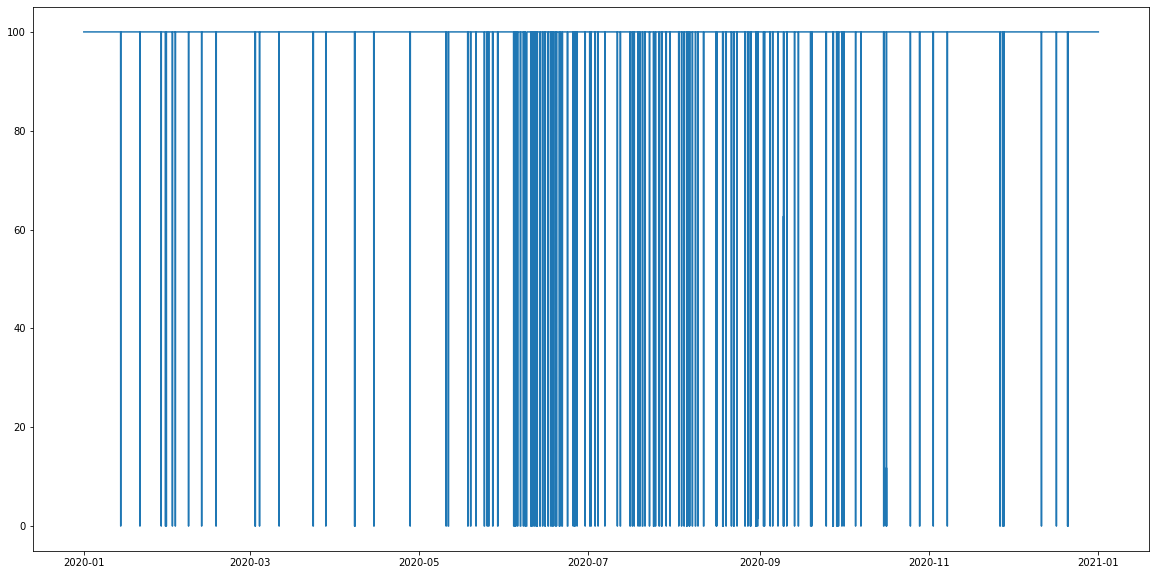

In [90]:
# Grid Availability
print(f"Average availability: {round(plant_1['Grid Availability'].mean()*100,2)}")
plt.figure(figsize=(20,10))
plt.plot(plant_1['Grid Availability']*100);

Average availability: 99.08


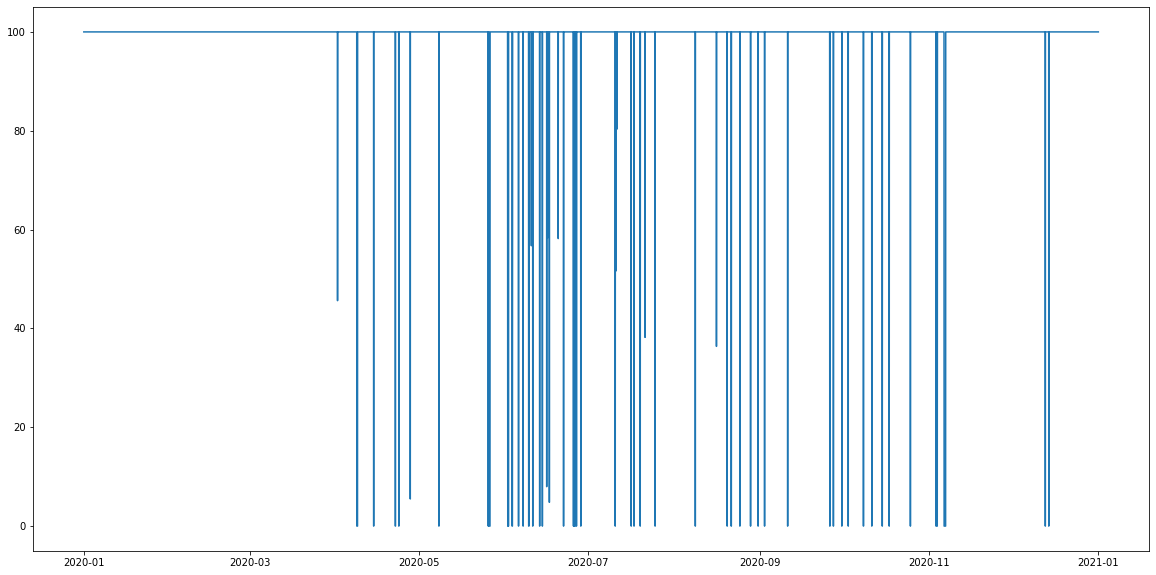

In [89]:
# Contractual Availability
print(f"Average availability: {round(plant_1['Contractual Availability'].mean()*100,2)}")
plt.figure(figsize=(20,10))
plt.plot(plant_1['Contractual Availability']*100);

Average availability: 98.56


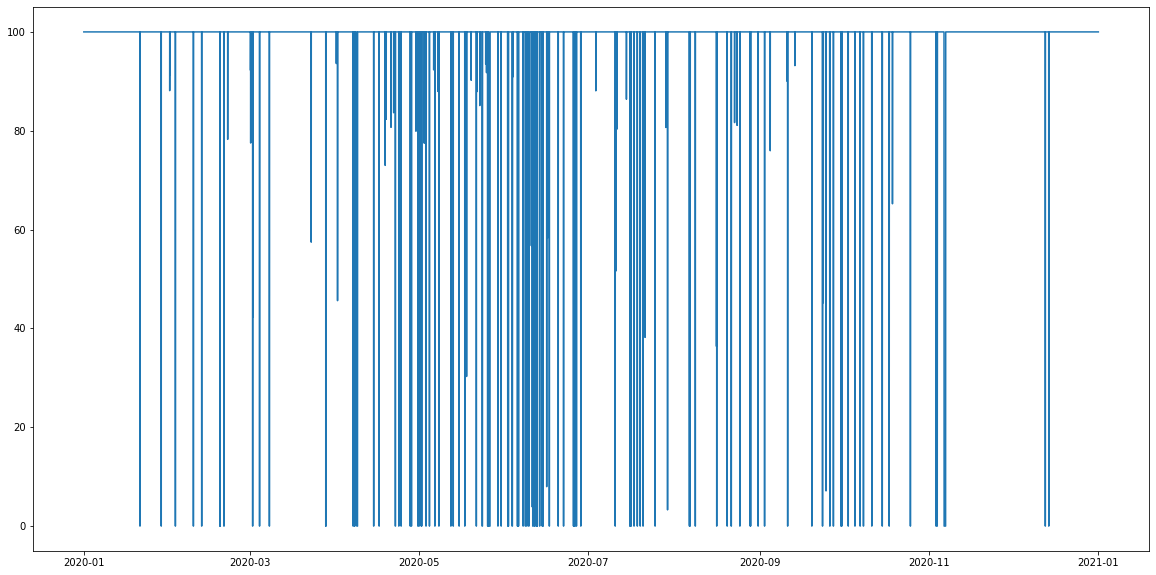

In [91]:
# Technical Availability
print(f"Average availability: {round(plant_1['Technical Availability'].mean()*100,2)}")
plt.figure(figsize=(20,10))
plt.plot(plant_1['Technical Availability']*100);

We can see a majority of events are at 0%, with some periods of high availability (eg. towards end of the year). Some events also have partial availabilities (not solely 0 or 100% availability).

**Note:** This plant's grid availability is especially low compared to other operational plants. While we may want to tone down the number of extreme events, it can be a good example of poor performing assets.

# Create synthetic availability methodology

## Event frequency

Aim from this methodology is get long periods of availability, with few events (`frequency`) of varying longevity (`severity`), while keeping annual and monthly availability within reasonable figures.

### Generate random events

In [100]:
# Using Numpy, randomise events according to a Gaussian distribution.
events = pd.DataFrame(np.random.normal(loc=1.5, scale=0.32, size=len(plant_2)))

- `loc` represents the center of the distribution. Set at 150% (off-chart) so that the events are less 'extreme' in nature.    *E.g. When set at 1, too many event gravitate around 50% and 150%. By setting it at 1.5, the majority of events occur between 75% and 225%.*
- `scale` represents that standard deviation. Between 0.25 and 0.4 will generate only a few extreme values between 0 and 1, with a majority between 0.5 and 1. We can then clean up (see methodology below) to work with the minority of extreme values between 0 and 0.5.
- `size` is equal to the number of data points to generate.

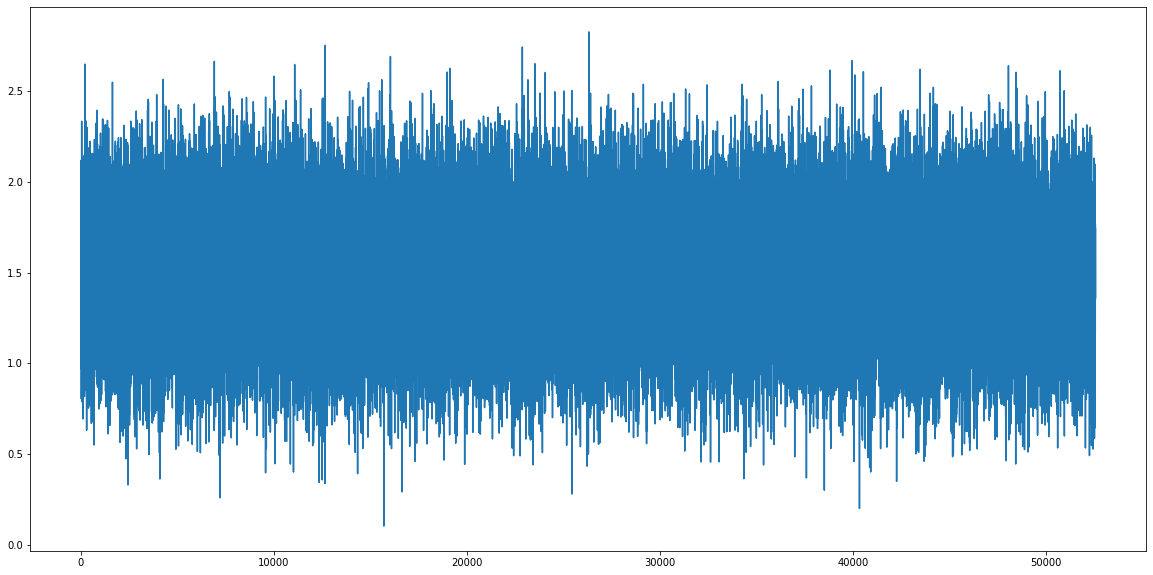

In [101]:
# Resulting in a few events spread across the timeseries
plt.figure(figsize=(20,10))
plt.plot(events);

### Cut-of unrealistic values
We are only interested in events happening between 0% and 100%

In [102]:
events[events > 1] = 1
events[events < 0] = 0

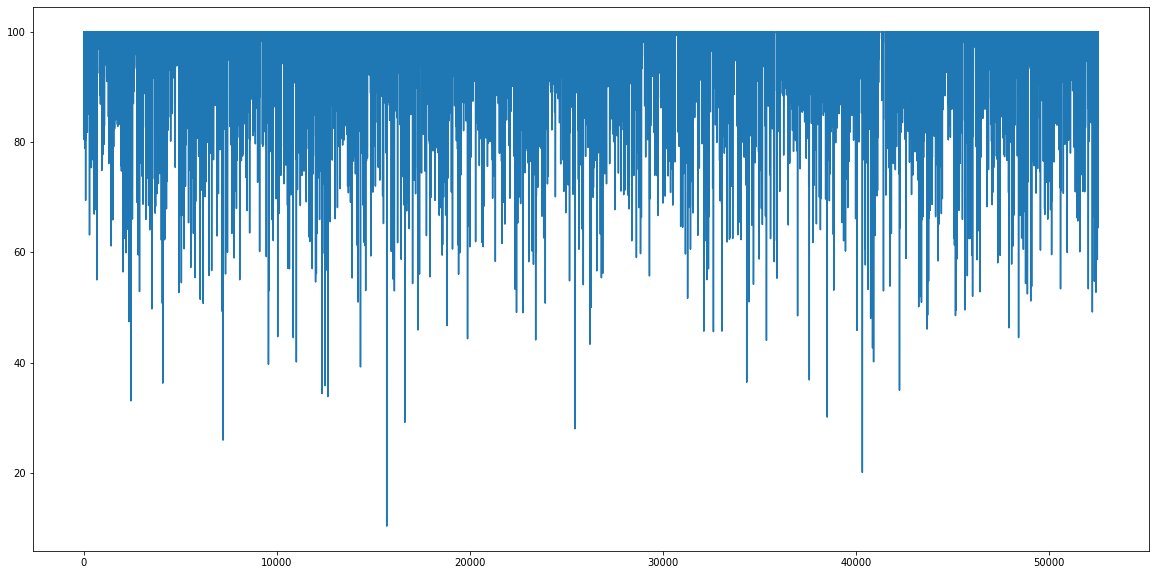

In [103]:
# Resulting in many events spread between 50% and 100%
plt.figure(figsize=(20,10))
plt.plot(events*100);

### Eliminate some of the noise

This can be done by rounding some of the figures.

*E.g. assume if availability is below 50% (or certain quartile), then it should be 0% & vice-versa if above a certain threshold / quartile.*

In [104]:
# According to quartiles
# cutOff = tech_avail.quantile(0.0005).values[0]

In [105]:
# According to specific threshold
events[events < 0.4] = 0
events[events > 0.6] = 1

# Leaving a gap between 0.4 and 0.6 to leave some partial availability events 

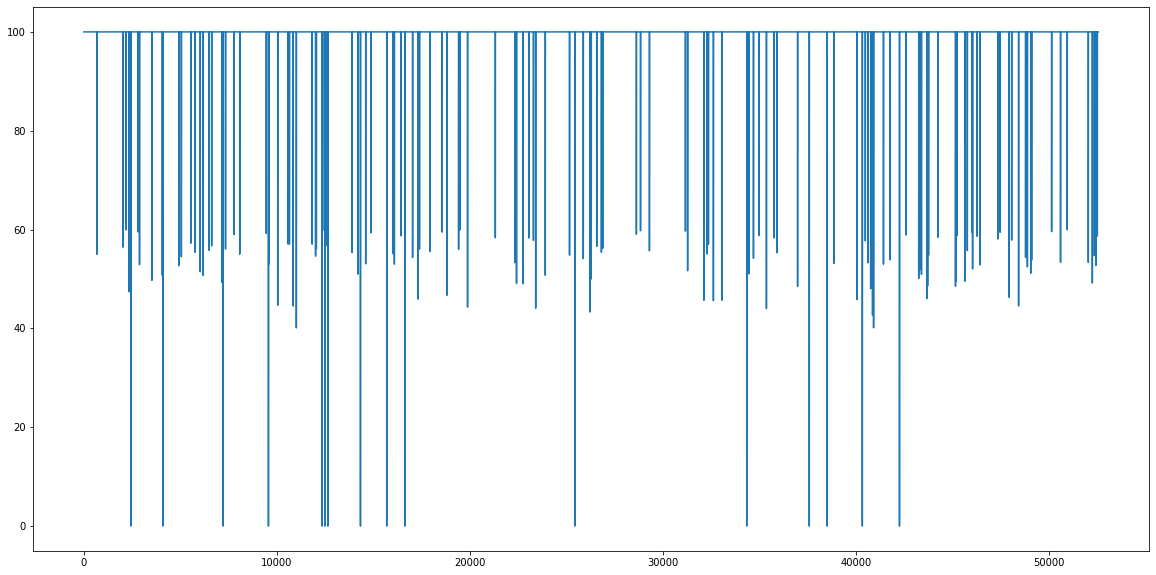

In [106]:
# Resulting in a few events spread across the timeseries.
plt.figure(figsize=(20,10))
plt.plot(events*100);

### Event frequency results 

In [107]:
mean = 100 - (events.mean().values[0] * 100)
print(f'Unavailability Events: {mean:.3f}%')

Unavailability Events: 0.144%


## Event severity

### Increase severity (duration) of events

To add some variation (e.g. to avoid having all events of identical duration), we will set a minimum (e.g. 0hrs) and maximum (e.g. 1 day) duration. 

A value can then be randomly selected between these lower and upper bounds.

In [118]:
lower_bound = 1
upper_bound = 144 # 24hrs x 6 timesteps of 10min

In [119]:
# Output array (based on input to start off)
tech_avail = events.copy()

In the instance where one event is extended & reaches another event, we should not reset the calculation. Else we might end up with long periods of unavailability due to randomness.

We will therefore use a `flag`, which will follow the index of the for-loop. When encountering an unavailability index, the flag is set forward in time, to the end of the downtime event. Any unavailability event detected *before* the flag is reached will be ignored.

Once the flag is reached, it reverts back to increasing with the index, until next unavailability occurs.

In [120]:
# Initialise flag
unavailability_flag = events.index[0]

In [121]:
for index, value in events.itertuples():
    
    # Check if availability flag is set in future
    if index < unavailability_flag:
        # If so, extend downtime event until the flag is reached
        tech_avail.loc[index] = 0
    
    else:
        # Check if new availability event is occuring during timestep
        if value < 1:
            # Randomise new downtime period
            length_downtime = np.random.randint(lower_bound, upper_bound)
            
            # Set unavailability flag (downtime event endpoint)
            unavailability_flag = index + (length_downtime)
            
            # Keep low availability (0%-99%) during period
            tech_avail.loc[index] = value
        
        # Last scenario where no downtime event was detected
        else:
            # Increase flag with index
            unavailability_flag = index
            # Keep availability (1) during period
            tech_avail.loc[index] = value

In [122]:
tech_avail.mean() * 100

0    84.093751
dtype: float64

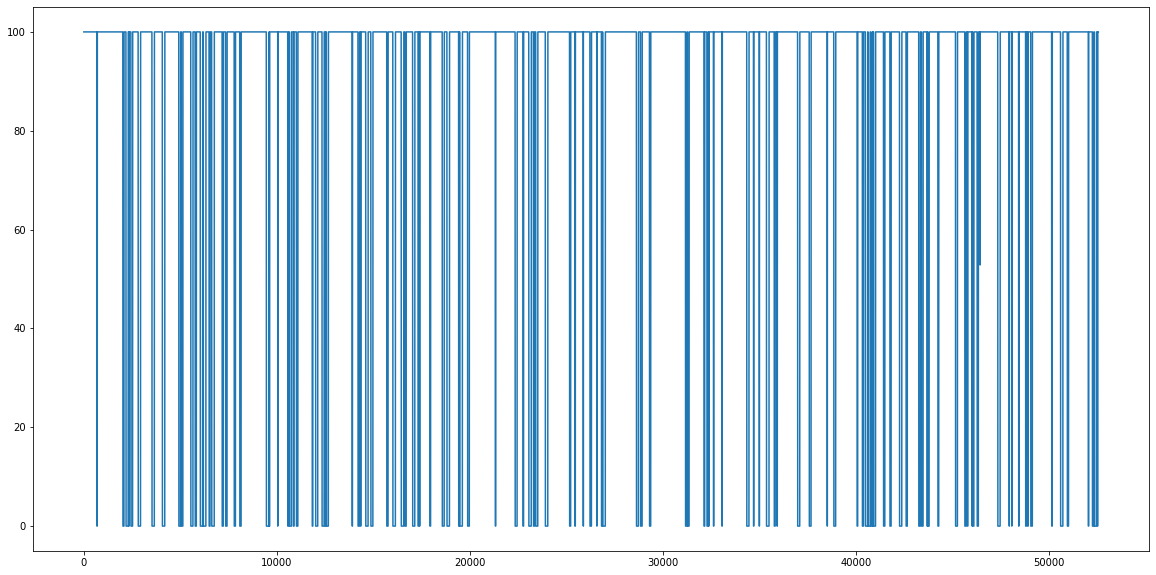

In [123]:
plt.figure(figsize=(20,10))
plt.plot(tech_avail*100);

# Synthetic Availability Function

Aim of this function would be to enter a frequency and severity parameter (e.g. scale from 1 to 10) and to receive an array of events, which have reasonable average availability figures for the parameters input.

E.g. Availability with frequency of 1 and severity of 1 should be close to 100%, while frequency of 10 and severity of 10 should be close to 0%. 

Additionally, the scales should be exponential (e.g. increasing severity from 1 to 3 should not decrease availability by simply 10%, but perhaps only 1%, while going from 8 to 10 might decrease availability value by more than 30%).

## Working out scaling

### Frequency

In [166]:
frequency = 3 # Number 1 to 10

In [167]:
# Rescaled to methodology
freq_to_scale = 0.25 + (frequency / 100)

Unavailability Events: 0.027%


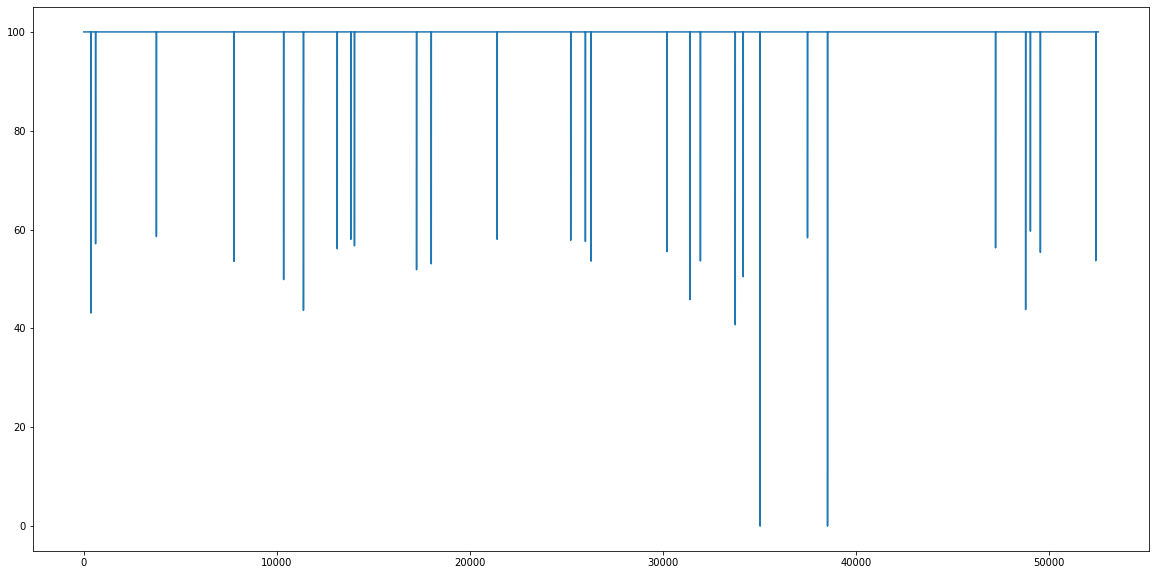

In [168]:
# Frequency methodology:
events = pd.DataFrame(np.random.normal(loc=1.5, scale=freq_to_scale, size=len(plant_2)))

# Set upper and lower bounds (0 to 100%) & eliminate noise
events[events < 0.4] = 0
events[events > 0.6] = 1

# Resulting in a few events spread across the timeseries.
plt.figure(figsize=(20,10))
plt.plot(events*100);

# Event frequency results
mean = 100 - (events.mean().values[0] * 100)
print(f'Unavailability Events: {mean:.3f}%')

### Severity

In [169]:
# The formula below attempt to transform a scale from 1 to 10 into the lower and upper bounds
for severity in range(1,11): # Severity input from scale of 1 (low) to 10 (high)
    s_min = 10** (severity/5)
    s_max = (10** (severity/2.5)) + 6
    print(f"Severity lvl {severity}: from {int(s_min/6)}hr to {int(s_max/6)}hr \n")

Severity lvl 1: from 0hr to 1hr 

Severity lvl 2: from 0hr to 2hr 

Severity lvl 3: from 0hr to 3hr 

Severity lvl 4: from 1hr to 7hr 

Severity lvl 5: from 1hr to 17hr 

Severity lvl 6: from 2hr to 42hr 

Severity lvl 7: from 4hr to 106hr 

Severity lvl 8: from 6hr to 265hr 

Severity lvl 9: from 10hr to 664hr 

Severity lvl 10: from 16hr to 1667hr 



In [170]:
severity = 5 # Number 1 to 10

In [171]:
severity_min = 10** (severity/5)
severity_max = (10** (severity/2.5)) + 6

In [172]:
unavailability_flag = 0

for index, value in events.itertuples():
    # Check if availability flag is set in future
    if index < unavailability_flag:
        # If so, extend downtime event
        tech_avail.loc[index] = 0
    else:
        # Check if new availability event is occuring
        if value < 1:
            # Randomise downtime period
            length_downtime = np.random.randint(severity_min, severity_max)
            # Set unavailability flag (downtime event endpoint)
            unavailability_flag = index + (length_downtime)
            # Keep no availability (0) during period
            tech_avail.loc[index] = value
        else:
            # Increase flag with index
            unavailability_flag = index
            # Keep availability (1) during period
            tech_avail.loc[index] = value

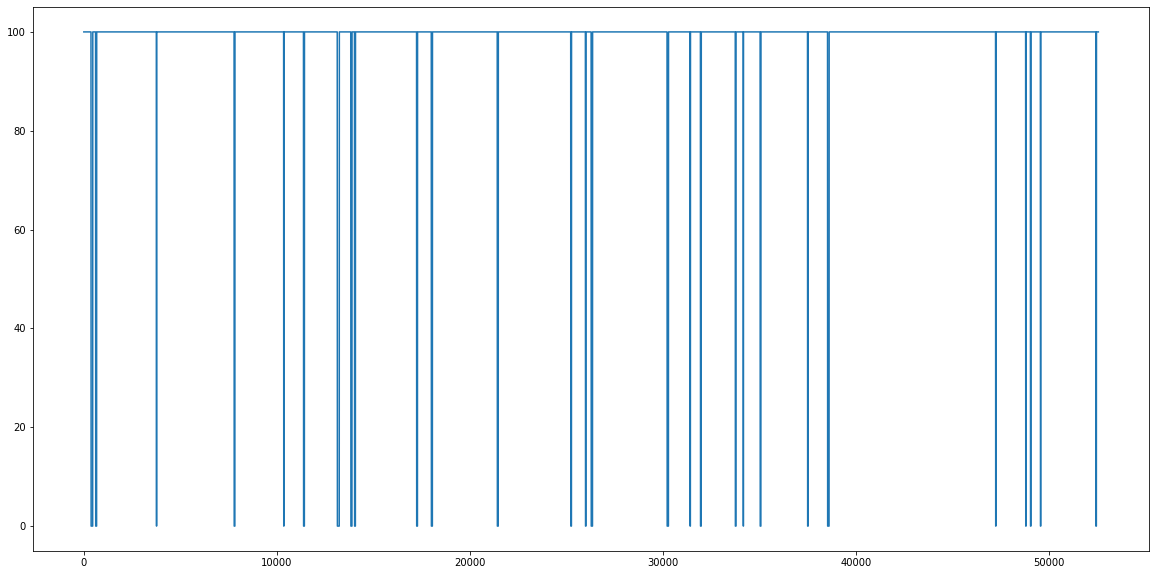

In [173]:
plt.figure(figsize=(20,10))
plt.plot(tech_avail*100);

In [174]:
mean = tech_avail.mean().values[0] * 100
print(f'Availability: {mean:.3f}%')

Availability: 97.709%


## Callable function

In [ ]:
def synthetic_avail(size, severity, frequency, show=True):
    """ 
    Aim from this methodology is get long periods of availability, with few events of varying longevity,
    while keeping annual and monthly availability within reasonable figures.

    This is done by first randomising very few unavailability events, and remove non-extreme ones.
    Then, the unavailability periods are extended (duration is also randomised according to severity bins).

    Result is not perfect, but should work well enough:
    e.g. severity - frequency ~ availability
            1     -     1     ~    99.9%
            5     -     1     ~    97.0%
            7.5   -     1     ~    90.0%
            10    -     1     ~    30.0%
            10    -     10    ~     1.5%
            1     -     10    ~    98.0%
            1     -     7.5   ~    99.0%
            1     -     5     ~    99.5%
            5     -     5     ~    93.0%
    
    ---------
    Parameters:
    - size: int
            Size of the output series. Should be equal to that of the dataset
    - severity: int
                Number from 1 to 10 representing the severity (durations) of the events.
                1 being lowest severity, 10 being higest severity.
                E.g. severity level ~ lower_bound - upper_bound
                           1        ~       10min - 1hr
                           3        ~      30min  - 3hrs
                           5        ~        2hrs - 0.5day
                           8        ~      0.5day - 10days
                           10       ~       2days - 2months
    - frequency: int
            Number from 1 to 10 representing the frequency of the events.
            1 being lowest frequency, 10 being higest frequency
    """
    freq_to_scale = 0.25 + (frequency / 100)
    severity_min = 10** (severity/5)
    severity_max = (10** (severity/2.5)) + 6
    
    # Randomise events
    events = pd.DataFrame(np.random.normal(loc=1.5, scale=freq_to_scale, size=size))
    # Scale between 0.25 and 0.4 to get values between 0.0% and 1.0% unavailability events.  
    
    # Assume if availability is below 50% (or certain quartile), then it should be 0%. 
    # & vice-versa if above.

    # cutOff = tech_avail.quantile(0.0005).values[0]
    events[events < 0.5] = 0
    events[events > 0.6] = 1

    tech_avail = events.copy()
    # The unavailability flag follows the index, however, when encountering an unavailability index, 
    # is set forward in time as the end of the downtime event. Period in time is randomly assigned for up to 12hrs.
    # Once end flag is reached, revert back to increasing flag with the index, until next unavailability occurs.
    unavailability_flag = 0

    for index, value in events.itertuples():
        # Check if availability flag is set in future
        if index < unavailability_flag:
            # If so, extend downtime event
            tech_avail.loc[index] = 0
        else:
            # Check if new availability event is occuring
            if value < 1:
                # Randomise downtime period
                length_downtime = np.random.randint(severity_min, severity_max)
                # Set unavailability flag (downtime event endpoint)
                unavailability_flag = index + (length_downtime)
                # Keep no availability (0) during period
                tech_avail.loc[index] = value
            else:
                # Increase flag with index
                unavailability_flag = index
                # Keep availability (1) during period
                tech_avail.loc[index] = value
        
    mean = tech_avail.mean().values[0] * 100
    print(f'Availability: {mean:.3f}%')
    
    if show:
        plt.figure(figsize=(20,10))
        plt.plot(tech_avail*100);
    
    return tech_avail

# Append sythetic data

## Grid availability

In [ ]:
severity=1
frequency=3

In [ ]:
grid_availability = synthetic_avail(size=len(plant_2), severity=severity, frequency=frequency)

In [ ]:
# Identical across all wind turbine in the plant
for wtg in plant_2:
    plant_2[wtg]['Grid Availability'] = grid_availability

## Contractual Availability

In [ ]:
severity=3
frequency=5

In [ ]:
example = synthetic_avail(size=len(plant_2), severity=severity, frequency=frequency)

In [ ]:
# Independent for each wind turbine
for wtg in plant_2:
    plant_2[wtg]['Contractual Availability'] = synthetic_avail(severity=severity, 
                                                               frequency=frequency, 
                                                               size=len(plant_2[wtg]),
                                                               show=False)

## Technical Availability

In [ ]:
severity=3
frequency=7

In [ ]:
example = synthetic_avail(size=len(plant_2), severity=severity, frequency=frequency)

In [ ]:
# Independent for each wind turbine
for wtg in plant_2:
    plant_2[wtg]['Technical Availability'] = synthetic_avail(severity=severity, 
                                                             frequency=frequency, 
                                                             size=len(plant_2[wtg]),
                                                             show=False)

## Verify

In [ ]:
plant_2.head()

In [ ]:
plant_2.info()